## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = ((x-x.min()) / ((x.max()-x.min())-0.5))*2
    #x = ((x-min(x)) / ((max(x)-min(x))-0.5))*2
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y
#x = ((x-min(x)) / ((max(x)-min(x))-0.5))*2
#使用此種寫法標準化, 下方在資料前處理時會出現下列錯誤
##ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)               

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 3s 14ms/step - loss: 2.0814 - accuracy: 0.2326 - val_loss: 1.8943 - val_accuracy: 0.3161
Epoch 2/100
196/196 [==============================] - 2s 12ms/step - loss: 1.7924 - accuracy: 0.3538 - val_loss: 1.7456 - val_accuracy: 0.3704
Epoch 3/100
196/196 [==============================] - 3s 14ms/step - loss: 1.6898 - accuracy: 0.3936 - val_loss: 1.6559 - val_accuracy: 0.4038
Epoch 4/100
196/196 [==============================] - 3s 13ms/step - loss: 1.6158 - accuracy: 0.4213 - val_loss: 1.5946 - val_accuracy: 0.4372
Epoch 5/100
196/196 [==============================] - 3s 13ms/step - loss: 1.5708 - accuracy: 0.4356 - val_loss: 1.5748 - val_accuracy: 0.4400
Epoch 6/100
196/196 [==============================] - 2s 13ms/step - loss: 1.5339 - accuracy: 0.4487 - val_loss: 1.6169 - val_accuracy: 0.4267
Epoch 7/100
196/196 [==============================] - 3s 13ms/step - loss: 1.5042 - accuracy: 0.4601 - val_loss: 1.4860 - val_accuracy:

196/196 [==============================] - 3s 13ms/step - loss: 0.6392 - accuracy: 0.7701 - val_loss: 1.8848 - val_accuracy: 0.5116
Epoch 58/100
196/196 [==============================] - 3s 13ms/step - loss: 0.6344 - accuracy: 0.7699 - val_loss: 1.9277 - val_accuracy: 0.5120
Epoch 59/100
196/196 [==============================] - 2s 13ms/step - loss: 0.6125 - accuracy: 0.7800 - val_loss: 1.9695 - val_accuracy: 0.5029
Epoch 60/100
196/196 [==============================] - 3s 13ms/step - loss: 0.6269 - accuracy: 0.7737 - val_loss: 1.9978 - val_accuracy: 0.5083
Epoch 61/100
196/196 [==============================] - 2s 13ms/step - loss: 0.6015 - accuracy: 0.7849 - val_loss: 1.9559 - val_accuracy: 0.5162
Epoch 62/100
196/196 [==============================] - 3s 13ms/step - loss: 0.5945 - accuracy: 0.7863 - val_loss: 2.0119 - val_accuracy: 0.4987
Epoch 63/100
196/196 [==============================] - 3s 13ms/step - loss: 0.5780 - accuracy: 0.7922 - val_loss: 2.0893 - val_accuracy: 0.496

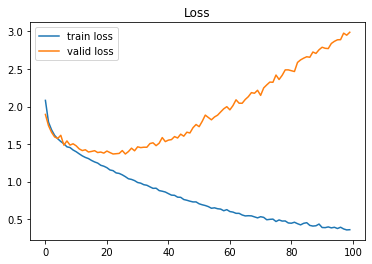

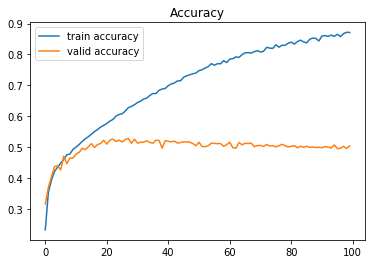

In [10]:
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()